___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# PART- 2 `(Handling With Missing Vales & Outliers )`

`( Handling With Outliers )`

In [957]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

# import lux

import warnings
warnings.filterwarnings("ignore")

# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 200)

# Set it to None to display all columns in the dataframe
# pd.set_option('display.max_columns', None)

from requests import request
import json
from pandas.io.json import json_normalize

from pandas import json_normalize

In [958]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

In [959]:
df= pd.read_csv("scout_clean.csv")
df.head(3)

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,Consumption,make,hp_kW,used_new,fuel_type,upholstery_kind,upholstery_color,door_count,seat_count,auto_manuel,displacement_cc,consumption_comb,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,2.0,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]",Audi,66,Used,Diesel (Particulate Filter),Cloth,Black,5.0,5.0,Automatic,1422.0,3.8,99,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",NaN,NaN,3.0,Metallic,front,1220.0,NaN,0588/BDF,NaN,Yes,2021-06-01,1.4
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,NaN,"[['5.6 l/100 km (comb)'], ['7.1 l/100 km (city)'], ['4.7 l/100 km (country)']]",Audi,141,Used,Gasoline,Cloth,Grey,3.0,4.0,Automatic,1798.0,5.6,129,"Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows","Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system","Alloy wheels,Sport seats,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",7.0,NaN,4.0,NaN,front,1255.0,NaN,0588/BCY,4 (Green),NaN,NaN,1.8
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+music,Sedans,14640,VAT deductible,83450.0,2016-02-01,1.0,"[['3.8 l/100 km (comb)'], ['4.4 l/100 km (city)'], ['3.4 l/100 km (country)']]",Audi,85,Used,Diesel (Particulate Filter),Cloth,Black,4.0,4.0,Automatic,1598.0,3.8,99,"Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",NaN,NaN,NaN,Metallic,front,NaN,NaN,NaN,4 (Green),NaN,NaN,1.6


In [960]:
df.drop(columns=["Consumption", "consumption_comb"], inplace=True)

## consumption & consumption_comb
These columns are not clean. They will be generated again from the original data.

In [961]:
dfcons = pd.read_csv("consumption.csv")

In [962]:
dfcons.head(3)

,Consumption,consumption_comb
0,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]",3.8
1,"[['5.6 l/100 km (comb)'], ['7.1 l/100 km (city)'], ['4.7 l/100 km (country)']]",5.6
2,"[['3.8 l/100 km (comb)'], ['4.4 l/100 km (city)'], ['3.4 l/100 km (country)']]",3.8


In [963]:
dfcons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Consumption       object 
 1   consumption_comb  float64
dtypes: float64(1), object(1)
memory usage: 248.9+ KB


In [964]:
df = pd.concat([df,dfcons], axis=1).drop(columns="Consumption")

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column               Dtype  
---  ------               -----  
 0   make_model           object 
 1   short_description    object 
 2   body_type            object 
 3   price                int64  
 4   vat                  object 
 5   km                   float64
 6   registration         object 
 7   prev_owner           float64
 8   make                 object 
 9   hp_kW                object 
 10  used_new             object 
 11  fuel_type            object 
 12  upholstery_kind      object 
 13  upholstery_color     object 
 14  door_count           float64
 15  seat_count           float64
 16  auto_manuel          object 
 17  displacement_cc      float64
 18  co2_emission         object 
 19  comfort              object 
 20  digi_media           object 
 21  extra                object 
 22  safety               object 
 23  gears                float64
 24  wa

## model column is missing

In [966]:
df["make_model"]

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
15914    Renault Espace
15915    Renault Espace
15916    Renault Espace
15917    Renault Espace
15918    Renault Espace
Name: make_model, Length: 15919, dtype: object

In [967]:
df.make_model.str.split().str[1].value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: make_model, dtype: int64

In [968]:
df["model"] = df.make_model.str.split().str[1] # model column was missing

In [969]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'make', 'hp_kW', 'used_new', 'fuel_type', 'upholstery_kind', 'upholstery_color', 'door_count', 'seat_count', 'auto_manuel', 'displacement_cc', 'co2_emission', 'comfort', 'digi_media', 'extra', 'safety', 'gears', 'warranty', 'cylinders', 'paint_type', 'drive_chain', 'weight_kg', 'country_ver', 'model_code', 'Emission_Label', 'new_inspection', 'next_inspection', 'cc_from_description', 'consumption_comb', 'model'], dtype='object')

In [970]:
df.isnull().sum()

make_model                 0
short_description         46
body_type                 60
price                      0
vat                     4513
km                      1024
registration            1597
prev_owner              6828
make                       0
hp_kW                      0
used_new                   2
fuel_type                  2
upholstery_kind         4871
upholstery_color        5861
door_count               212
seat_count               977
auto_manuel                0
displacement_cc          496
co2_emission            2436
comfort                  920
digi_media              1374
extra                   2962
safety                   982
gears                   4712
warranty               13123
cylinders               5680
paint_type              5772
drive_chain             6858
weight_kg               6974
country_ver             8333
model_code             10941
Emission_Label         11974
new_inspection         12349
next_inspection        13094
cc_from_descri

## body_type 

In [971]:
df["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [972]:
df["body_type"].replace("Other", np.NaN, inplace=True)
df["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
NaN               350
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [973]:
df["model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [974]:
def fill_na_mode (group_column, missing_value_column):
    ''' This function replaces NaN values of a column (missing_value_column) after doing a groupby like operation with a column (group_column). 
    
    The function replaces the NaN values with the mode of the "missing_value_column" after groupby.
    
    Parameters:
    group_column: the column for groupby:It should be given as "df[column_name]"
    missing_value_column: The column that the function will replace the null values: It should be given as: "column_name"
    '''
    for i in list(group_column.unique()):
        A = df.loc[group_column == i, missing_value_column] 
        A = A.fillna(A.mode()[0])
        df.loc[group_column == i, missing_value_column] = A
    print (df[missing_value_column].isnull().sum(), " NaN values remained in ", missing_value_column, " column")

In [975]:
fill_na_mode(df["model"], "body_type")

0  NaN values remained in  body_type  column


In [976]:
df["body_type"].value_counts(dropna=False)

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [977]:
df["body_type"].unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

## registration & age (new created from registration) & km

In [978]:
df["registration"].value_counts(dropna=False)

NaN           1597
2018-03-01     695
2019-02-01     585
2018-05-01     572
2019-03-01     543
2019-01-01     541
2018-04-01     541
2018-02-01     539
2016-03-01     536
2016-04-01     532
2018-06-01     532
2018-01-01     511
2019-04-01     506
2016-02-01     472
2017-03-01     471
2016-05-01     459
2016-06-01     452
2019-05-01     440
2017-06-01     409
2017-05-01     404
2018-07-01     396
2017-04-01     380
2016-01-01     376
2017-02-01     368
2017-01-01     306
2018-08-01     285
2019-06-01     224
2017-07-01     215
2017-11-01     180
2016-07-01     176
2016-10-01     160
2017-10-01     154
2017-09-01     149
2016-11-01     142
2018-09-01     141
2016-09-01     141
2016-12-01     134
2017-12-01     123
2017-08-01     114
2018-11-01     110
2018-12-01     103
2018-10-01      97
2016-08-01      94
2019-07-01       6
2019-09-01       5
2019-08-01       1
2019-11-01       1
2019-12-01       1
Name: registration, dtype: int64

In [979]:
df["registration"] = pd.to_datetime(df["registration"])

In [980]:
df["registration"].value_counts(dropna=False)

NaT           1597
2018-03-01     695
2019-02-01     585
2018-05-01     572
2019-03-01     543
2019-01-01     541
2018-04-01     541
2018-02-01     539
2016-03-01     536
2016-04-01     532
2018-06-01     532
2018-01-01     511
2019-04-01     506
2016-02-01     472
2017-03-01     471
2016-05-01     459
2016-06-01     452
2019-05-01     440
2017-06-01     409
2017-05-01     404
2018-07-01     396
2017-04-01     380
2016-01-01     376
2017-02-01     368
2017-01-01     306
2018-08-01     285
2019-06-01     224
2017-07-01     215
2017-11-01     180
2016-07-01     176
2016-10-01     160
2017-10-01     154
2017-09-01     149
2016-11-01     142
2018-09-01     141
2016-09-01     141
2016-12-01     134
2017-12-01     123
2017-08-01     114
2018-11-01     110
2018-12-01     103
2018-10-01      97
2016-08-01      94
2019-07-01       6
2019-09-01       5
2019-08-01       1
2019-11-01       1
2019-12-01       1
Name: registration, dtype: int64

In [981]:
df[["registration", "km"]].sample(50)

,registration,km
6049,2017-01-01,78771.0
12290,2018-02-01,29798.0
2692,2016-01-01,120522.0
8147,NaT,NaN
14518,NaT,0.0
6830,2017-06-01,25200.0
13848,2016-08-01,62000.0
13826,2016-06-01,81400.0
13650,2019-02-01,NaN
9722,2018-02-01,9847.0


In [982]:
df["age"] = 2019 - df.registration.dt.year # we are calculating as we are in 2019.

In [983]:
def fill_na_mean (group_column, missing_value_column):
    ''' This function replaces NaN values of a column (missing_value_column) after doing a groupby like operation with a column (group_column). 
    
    The function replaces the NaN values with the mean of the "missing_value_column" after groupby.
    
    Parameters:
    group_column: the column for groupby:It should be given as "df[column_name]"
    missing_value_column: The column that the function will replace the null values: It should be given as: "column_name"
    '''
    for i in list(group_column.unique()):
        A = df.loc[group_column == i, missing_value_column] 
        A = A.fillna(A.mean())
        df.loc[group_column == i, missing_value_column] = A
    print (df[missing_value_column].isnull().sum(), " NaN values remained in ", missing_value_column, " column")

In [984]:
df.km.mean()

34130.127828130244

In [985]:
df.km.value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

In [986]:
df.km.isnull().sum(), df["age"].isnull().sum()

(1024, 1597)

In [987]:
df.km.sample(50)

12007     27112.0
12294      3095.0
8401      19500.0
7673         15.0
6860      23176.0
1479      33360.0
15077     49606.0
2239       1071.0
11647     26607.0
856       13011.0
9189      29322.0
9492      20932.0
894       22000.0
2375          NaN
11748     30050.0
15661        20.0
3355      32000.0
4841      19980.0
2174          NaN
2836     124136.0
1208       6100.0
5908      20940.0
8829         10.0
15185     77931.0
5573          NaN
9346      10000.0
1868      16900.0
11439     24905.0
15015     19800.0
11933     12500.0
2218          NaN
1807       6383.0
15819         1.0
5751      34209.0
4951       5250.0
9573      21141.0
13392     58000.0
8736      35000.0
1836      10000.0
2409         10.0
13529     30012.0
4727      20484.0
15344     40000.0
9580      25000.0
14714        10.0
14654     20279.0
2999      93307.0
4754       4103.0
4888       6830.0
599       27600.0
Name: km, dtype: float64

In [988]:
df["km"].describe()

count     14895.000000
mean      34130.127828
std       37352.977568
min           0.000000
25%        5153.000000
50%       22740.000000
75%       49371.500000
max      317000.000000
Name: km, dtype: float64

In [989]:
fill_na_mean(df["age"], "km") # because age column is also NaN in these 838 rows. now we will fill them 
                              # with the km column according to the mean km for age.

838  NaN values remained in  km  column


In [990]:
df.km.isnull().sum(), df["age"].isnull().sum()

(838, 1597)

In [991]:
df.groupby("age")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,2853.0,2085.355137,5225.765126,1.0,10.0,80.0,2627.00,127022.0
1.0,4522.0,18035.239072,11005.976848,1.0,10000.0,18000.0,25000.75,136000.0
2.0,3273.0,41754.940709,28291.423634,1.0,21550.0,34772.0,54800.00,317000.0
3.0,3674.0,77442.520958,39170.142977,10.0,48000.0,72914.5,99950.00,291800.0


In [992]:
def numeric_to_cat(x):
    if x <= 2627.00:
        return 0
    elif 2627.00 < x <= 25000.75:
        return 1
    elif 25000.75 < x <= 54800.00:
        return 2
    elif 54800.00 < x:
        return 3
    

In [993]:
df["km"].apply(numeric_to_cat)

0        3.0
1        3.0
2        3.0
3        3.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    0.0
15917    0.0
15918    0.0
Name: km, Length: 15919, dtype: float64

In [994]:
df["km"].apply(numeric_to_cat).value_counts(dropna=False)

1.0    5016
2.0    3460
3.0    3350
0.0    3255
NaN     838
Name: km, dtype: int64

In [995]:
df["km_cat"] = df["km"].apply(numeric_to_cat)

In [996]:
df["age"].fillna(df["km_cat"].apply(numeric_to_cat), inplace=True)

In [997]:
df.km.isnull().sum(), df["age"].isnull().sum() 

(838, 838)

In [998]:
df[["age", "km_cat"]].sample(50)

,age,km_cat
15774,0.0,0.0
14367,1.0,1.0
204,1.0,1.0
13609,3.0,3.0
4673,1.0,1.0
9036,2.0,2.0
2835,3.0,3.0
3357,3.0,1.0
14932,3.0,3.0
4879,1.0,0.0


In [999]:
df.age.isnull().sum()

838

In [1000]:
fill_na_mean(df["age"], "km") # these null are simultaneously null in both column.

838  NaN values remained in  km  column


In [1001]:
df[["age", "km"]].sample(50)

,age,km
5290,0.0,2085.355137
7832,NaN,NaN
6784,2.0,30.000000
8980,2.0,49000.000000
12767,0.0,10.000000
4271,2.0,92246.000000
11720,1.0,14600.000000
13599,3.0,66000.000000
4895,1.0,15829.000000
11272,2.0,14069.000000


In [1002]:
df.groupby("model")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
A1,2385.0,1.465409,1.123908,0.0,1.0,1.0,3.0,3.0
A2,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
A3,2982.0,1.536217,1.129280,0.0,1.0,2.0,3.0,3.0
Astra,2394.0,1.444444,1.072217,0.0,1.0,1.0,2.0,3.0
Clio,1790.0,1.500000,1.058781,0.0,1.0,1.0,2.0,3.0
Corsa,2171.0,1.259327,1.100691,0.0,0.0,1.0,2.0,3.0
Duster,16.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Espace,967.0,1.540848,1.175199,0.0,0.0,1.0,3.0,3.0
Insignia,2375.0,1.535158,1.052300,0.0,1.0,1.0,2.0,3.0


In [1003]:
df["age"].fillna(df["age"].mode()[0], inplace=True)
df["km"].fillna(df["km"].mean(), inplace=True)
df.km.isnull().sum(), df["age"].isnull().sum() 

(0, 0)

In [1004]:
print(df.age.describe(), 3* "\n", df.km.describe())

count    15919.000000
mean         1.440291
std          1.077911
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64 


 count     15919.000000
mean      33777.726625
std       36269.499617
min           0.000000
25%        5798.500000
50%       24053.000000
75%       46898.500000
max      317000.000000
Name: km, dtype: float64


In [1005]:
df.groupby("age")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.0,3612.0,1843.521928,5773.552243,0.0,10.00,15.0,2085.355137,127022.0
1.0,5360.0,20496.471268,11613.967663,1.0,11282.75,20563.5,29317.000000,136000.0
2.0,3273.0,41754.940709,28291.423634,1.0,21550.00,34772.0,54800.000000,317000.0
3.0,3674.0,77442.520958,39170.142977,10.0,48000.00,72914.5,99950.000000,291800.0


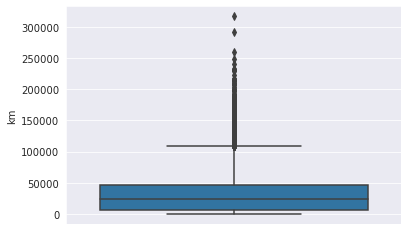

In [1006]:
sns.boxplot(data=df, y="km");

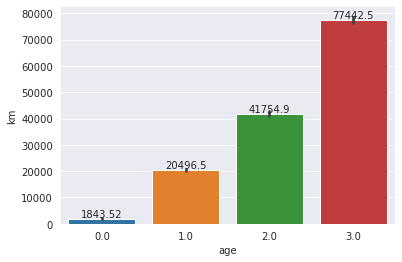

In [1007]:
g = sns.barplot(data=df, y="km", x="age",)

for container in g.containers:
    g.bar_label(container);

In [1008]:
df.isnull().sum()

make_model                 0
short_description         46
body_type                  0
price                      0
vat                     4513
km                         0
registration            1597
prev_owner              6828
make                       0
hp_kW                      0
used_new                   2
fuel_type                  2
upholstery_kind         4871
upholstery_color        5861
door_count               212
seat_count               977
auto_manuel                0
displacement_cc          496
co2_emission            2436
comfort                  920
digi_media              1374
extra                   2962
safety                   982
gears                   4712
warranty               13123
cylinders               5680
paint_type              5772
drive_chain             6858
weight_kg               6974
country_ver             8333
model_code             10941
Emission_Label         11974
new_inspection         12349
next_inspection        13094
cc_from_descri

## prev_owner 

In [1009]:
df.prev_owner.value_counts(dropna=False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

## used_new

In [1010]:
df.used_new.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: used_new, dtype: int64

In [1011]:
df.used_new.fillna("Used", inplace=True)


In [1012]:
df.used_new.value_counts(dropna=False)

Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: used_new, dtype: int64

## fuel_type

In [1013]:
df.fuel_type

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel_type, Length: 15919, dtype: object

In [1014]:
df.fuel_type.value_counts(dropna=False)

Diesel (Particulate Filter)                                                                                                       4315
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2982
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                                                                                                                       331
Super 95 (Particulate Filter)                          

In [1015]:
df.fuel_type.str.replace("/", " ")

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95   Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel_type, Length: 15919, dtype: object

In [1016]:
df.fuel_type.str.replace("/", " ").str.split()

0                            [Diesel, (Particulate, Filter)]
1                                                 [Gasoline]
2                            [Diesel, (Particulate, Filter)]
3                            [Diesel, (Particulate, Filter)]
4                            [Diesel, (Particulate, Filter)]
                                ...                         
15914                        [Diesel, (Particulate, Filter)]
15915    [Super, 95, Super, Plus, 98, (Particulate, Filter)]
15916                                               [Diesel]
15917                                               [Diesel]
15918                                            [Super, 95]
Name: fuel_type, Length: 15919, dtype: object

In [1017]:
fuel_list = list(df.fuel_type.str.replace("/", " ").str.split(pat= ",").dropna())
fuel_list

[['Diesel (Particulate Filter)'],
 ['Gasoline'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Gasoline'],
 ['Diesel (Particulate Filter)'],
 ['Super 95'],
 ['Regular Benzine 91'],
 ['Gasoline'],
 ['Super 95'],
 ['Diesel (Particulate Filter)'],
 ['Diesel'],
 ['Diesel (Particulate Filter)'],
 ['Gasoline'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particulate Filter)'],
 ['Super 95'],
 ['Gasoline'],
 ['Diesel (Particulate Filter)'],
 ['Gasoline'],
 ['Gasoline'],
 ['Super 95'],
 ['Gasoline'],
 ['Diesel'],
 ['Super 95'],
 ['Diesel'],
 ['Diesel (Particulate Filter)'],
 ['Super 95'],
 ['Diesel (Particulate Filter)'],
 ['Diesel'],
 ['Super 95'],
 ['Regular Benzine 91'],
 ['Diesel'],
 ['Gasoline'],
 ['Diesel (Particulate Filter)'],
 ['Super 95'],
 ['Diesel (Particulate Filter)'],
 ['Diesel (Particu

In [1018]:
fuel_list_unique = []
for i in fuel_list:
    if i not in fuel_list_unique:
        for ii in i:
            if ii not in fuel_list_unique:
                fuel_list_unique.append(ii)
fuel_list_unique

['Diesel (Particulate Filter)',
 'Gasoline',
 'Super 95',
 'Regular Benzine 91',
 'Diesel',
 'Regular Benzine 91   Super Plus 98   Regular Benzine E10 91   Super 95   Super E10 95   Super Plus E10 98',
 'Super E10 95',
 'Super 95 (Particulate Filter)',
 'Super 95   Regular Benzine 91',
 'Super 95   Super Plus 98   Super E10 95   Super Plus E10 98',
 'Super E10 95   Super 95',
 'Super 95   Regular Benzine 91   Super Plus 98',
 'Super 95   Super Plus 98   Super E10 95',
 'Super 95   Super Plus 98',
 'Super 95   Regular Benzine 91   Super E10 95   Super Plus E10 98   Super Plus 98   Regular Benzine E10 91',
 'Others',
 'Super 95   Super E10 95',
 'Gasoline (Particulate Filter)',
 'Regular Benzine E10 91   Regular Benzine 91   Super 95   Super Plus 98   Super E10 95   Super Plus E10 98',
 'Super E10 95   Super 95   Super Plus 98   Super Plus E10 98 (Particulate Filter)',
 'Regular Benzine E10 91',
 'Super 95   Super Plus 98   Super Plus E10 98   Super E10 95',
 'Regular Benzine 91 (Particu

In [1019]:
uni_fuel = []
for i in fuel_list_unique:
    if i not in uni_fuel:
        uni_fuel.append(i.split()[0])
set(uni_fuel)

{'Biogas',
 'CNG',
 'Diesel',
 'Domestic',
 'Electric',
 'Gasoline',
 'LPG',
 'Liquid',
 'Others',
 'Regular',
 'Super'}

In [1020]:
benzine = ["Super", "Regular"]
lpg = ["Biogas", "CNG", "Domestic", "Gasoline", "LPG", "Liquid"]
diesel = ["Diesel", ]
electric = ["Electric"]

In [1021]:
df.fuel_type.str.replace("/", " ").str.split().str[0]

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915       Super
15916      Diesel
15917      Diesel
15918       Super
Name: fuel_type, Length: 15919, dtype: object

In [1022]:
df["fuel"] = df.fuel_type.str.replace("/", " ").str.split().str[0]

In [1023]:
df["fuel"].value_counts(dropna=False)

Diesel      7297
Super       4790
Gasoline    3252
Regular      503
CNG           36
LPG           16
Liquid        10
Others         6
Electric       5
NaN            2
Biogas         1
Domestic       1
Name: fuel, dtype: int64

In [1024]:
benzine = ["Super", "Regular"]
lpg = ["Biogas", "CNG", "Domestic", "Gasoline", "LPG", "Liquid"]
diesel = ["Diesel"]
electric = ["Electric"]

def fuel_convert(x):
    if x in benzine:
        return "benzine"
    elif x in lpg:
        return "lpg"
    elif x in electric:
        return "electric"
    elif x in diesel:
        return "diesel"
    else:
        return "diesel"



In [1025]:
df["fuel"] = df["fuel"].apply(fuel_convert)

In [1026]:
df["fuel"].value_counts(dropna=False)

diesel      7305
benzine     5293
lpg         3316
electric       5
Name: fuel, dtype: int64

In [1027]:
df.drop(columns="fuel_type", inplace=True)

## upholstery_kind

In [1028]:
df["upholstery_kind"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_kind, dtype: int64

In [1029]:
def leather (x):
    if x == "Part leather":
        return "leather"
    elif x == "Full leather":
        return "leather"
    else:
        return "not_leather"

In [1030]:
df["upholstery_kind"] = df["upholstery_kind"].apply(leather)
df["upholstery_kind"].value_counts(dropna=False)

not_leather    13411
leather         2508
Name: upholstery_kind, dtype: int64

## upholstery_color

In [1031]:
df["upholstery_color"].value_counts(dropna=False)

 Black     7710
NaN        5861
 Grey      1103
 Other      960
 Brown      195
 Beige       51
 Blue        14
 White       11
 Red          9
 Yellow       4
 Orange       1
Name: upholstery_color, dtype: int64

In [1032]:
df.drop(columns="upholstery_color", inplace=True)

## door_count

In [1033]:
df["door_count"].value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: door_count, dtype: int64

In [1034]:
fill_na_mode(df["model"], "door_count")

0  NaN values remained in  door_count  column


## seat_count

In [1035]:
df["seat_count"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: seat_count, dtype: int64

In [1036]:
fill_na_mode(df["model"], "seat_count")

0  NaN values remained in  seat_count  column


## auto_manuel

In [1037]:
df["auto_manuel"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: auto_manuel, dtype: int64

In [1038]:
def auto_man(x): 
    if x == "Automatic":
        return "Automatic"
    else:
        return "Manuel"

In [1039]:
df["auto_manuel"] = df["auto_manuel"].apply(auto_man)
df["auto_manuel"].value_counts(dropna=False)

Manuel       8622
Automatic    7297
Name: auto_manuel, dtype: int64

## displacement_cc

In [1040]:
df["displacement_cc"].value_counts(dropna=False).sort_index()

1.0          36
2.0           2
54.0          1
122.0         1
139.0         4
140.0         1
160.0         6
890.0         1
898.0       351
899.0        11
900.0         4
929.0         5
973.0         1
995.0         2
996.0         1
997.0         4
998.0        72
999.0      2438
1000.0       40
1100.0        1
1149.0      288
1195.0        1
1197.0      353
1198.0        1
1199.0        3
1200.0       18
1229.0      677
1239.0        1
1248.0      110
1300.0        2
1333.0        1
1350.0        1
1364.0      102
1368.0        1
1369.0        1
1390.0        1
1395.0      320
1396.0        3
1397.0       11
1398.0     1314
1399.0      749
1400.0       90
1422.0      467
1461.0      595
1490.0      559
1495.0        2
1496.0        1
1498.0      196
1499.0        5
1500.0       50
1533.0        1
1568.0        1
1580.0        1
1584.0        1
1589.0        2
1596.0        4
1598.0     4761
1599.0        3
1600.0      130
1618.0      212
1686.0        1
1696.0        1
1798.0  

In [1041]:
fill_na_mode(df["model"],"displacement_cc")

0  NaN values remained in  displacement_cc  column


In [1042]:
df.loc[df["displacement_cc"] > 3000]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel
7169,Opel Astra,K ST Dynamic 1.6/Kamera/Allwetterr./Navi/,Station wagon,18490,VAT deductible,22327.0,2018-07-01,1.0,Opel,100,Employee's car,not_leather,5.0,5.0,Automatic,15898.0,119,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Heated steering wheel,Leather steering wheel,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating","Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",6.0,NaN,4.0,Metallic,front,NaN,NaN,NaN,NaN,Yes,2021-06-01,1.6,4.5,Astra,1.0,1.0,benzine
10932,Opel Insignia,NaN,Station wagon,14300,Price negotiable,76500.0,2016-03-01,NaN,Opel,88,Used,leather,5.0,5.0,Manuel,16000.0,NaN,"Air conditioning,Automatic climate control,Cruise control,Electrical side mirrors,Heads-up display,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Split rear seats,Start-stop system,Tinted windows","Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency system,Fog lights,LED Daytime Running Lights,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control",6.0,NaN,NaN,NaN,front,NaN,NaN,NaN,4 (Green),NaN,NaN,NaN,NaN,Insignia,3.0,3.0,diesel


In [1043]:
df.loc[df["displacement_cc"] > 3000]["displacement_cc"]

7169     15898.0
10932    16000.0
Name: displacement_cc, dtype: float64

In [1044]:
df.at[7169, "displacement_cc"] = 1600

In [1045]:
df.at[10932, "displacement_cc"] = 1600

In [1046]:
df.loc[df["displacement_cc"] < 800]["displacement_cc"]

7809     139.0
7810     139.0
7811     139.0
7812     139.0
8128     140.0
10194    122.0
10559      2.0
12467      1.0
12473      1.0
12484      1.0
12499      1.0
12501      1.0
12554      1.0
12604      1.0
12670      1.0
12750      1.0
12768      1.0
12769      1.0
12781      1.0
12783      1.0
12786      1.0
12790      1.0
12796      1.0
12798      1.0
12800      1.0
12815      1.0
12823      1.0
12835      1.0
12848      1.0
12849      1.0
13904      1.0
13912     54.0
14198      2.0
14284      1.0
14314      1.0
14315      1.0
14319      1.0
14320      1.0
14321      1.0
14322      1.0
14324      1.0
14325      1.0
14326      1.0
14327      1.0
14328      1.0
15574    160.0
15575    160.0
15576    160.0
15577    160.0
15578    160.0
15579    160.0
Name: displacement_cc, dtype: float64

In [1047]:
df.loc[df["displacement_cc"] < 800]["make_model"]

7809         Opel Astra
7810         Opel Astra
7811         Opel Astra
7812         Opel Astra
8128         Opel Astra
10194        Opel Corsa
10559     Opel Insignia
12467     Opel Insignia
12473     Opel Insignia
12484     Opel Insignia
12499     Opel Insignia
12501     Opel Insignia
12554     Opel Insignia
12604     Opel Insignia
12670     Opel Insignia
12750     Opel Insignia
12768     Opel Insignia
12769     Opel Insignia
12781     Opel Insignia
12783     Opel Insignia
12786     Opel Insignia
12790     Opel Insignia
12796     Opel Insignia
12798     Opel Insignia
12800     Opel Insignia
12815     Opel Insignia
12823     Opel Insignia
12835     Opel Insignia
12848     Opel Insignia
12849     Opel Insignia
13904      Renault Clio
13912      Renault Clio
14198      Renault Clio
14284      Renault Clio
14314      Renault Clio
14315      Renault Clio
14319      Renault Clio
14320      Renault Clio
14321      Renault Clio
14322      Renault Clio
14324      Renault Clio
14325      Renau

In [1048]:
df.loc[df["displacement_cc"] < 800][["displacement_cc"]].values

array([[139.],
       [139.],
       [139.],
       [139.],
       [140.],
       [122.],
       [  2.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [ 54.],
       [  2.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [  1.],
       [160.],
       [160.],
       [160.],
       [160.],
       [160.],
       [160.]])

In [1049]:
A = list(df.loc[df["displacement_cc"] < 800]["displacement_cc"].values)
A

[139.0,
 139.0,
 139.0,
 139.0,
 140.0,
 122.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 54.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0]

In [1050]:
df["displacement_cc"].replace(A, np.NaN, inplace=True)

In [1051]:
fill_na_mode(df["model"], "displacement_cc")

0  NaN values remained in  displacement_cc  column


In [1052]:
df["displacement_cc"].value_counts(dropna=False)

1598.0    5098
999.0     2467
1398.0    1389
1399.0     749
1461.0     701
1229.0     677
1956.0     670
1490.0     559
1422.0     467
1197.0     353
898.0      351
1395.0     320
1968.0     301
1149.0     288
1618.0     212
1798.0     210
1498.0     196
1600.0     132
1248.0     110
1997.0     103
1364.0     102
1400.0      90
998.0       72
1500.0      50
2000.0      46
1000.0      40
1998.0      25
2480.0      20
1984.0      18
1200.0      18
1397.0      11
899.0       11
929.0        5
1499.0       5
997.0        4
900.0        4
1596.0       4
1599.0       3
1396.0       3
1199.0       3
1589.0       2
1300.0       2
1495.0       2
995.0        2
890.0        1
1333.0       1
1580.0       1
1995.0       1
1533.0       1
1100.0       1
1198.0       1
1496.0       1
1368.0       1
1896.0       1
1584.0       1
1568.0       1
996.0        1
1696.0       1
1686.0       1
973.0        1
1856.0       1
1239.0       1
1350.0       1
1369.0       1
1390.0       1
1195.0       1
2967.0    

In [1053]:
df.loc[df["displacement_cc"] < 800]["displacement_cc"].value_counts()

Series([], Name: displacement_cc, dtype: int64)

## cc_from_description

In [1054]:
df["cc_from_description"].value_counts(dropna=False)

NaN    5186
1.6    3890
1.4    2531
1.0    1321
1.2     953
2.0     886
1.5     883
1.3     135
1.8      59
0.9      49
2.5      19
1.7       3
1.1       3
2.8       1
Name: cc_from_description, dtype: int64

In [1055]:
# fill_na_mode(df["model"], "weight_kg") raises value error because A2 model car is only 1 in df 
# when a value in in this row is null can not find it mode. so we will drop this because it has many 
# null rows and it makes the analysis difficult

In [1056]:
df = df.drop(index=2614)

In [1057]:
fill_na_mode(df["model"], "cc_from_description")

0  NaN values remained in  cc_from_description  column


In [1058]:
df[["cc_from_description", "displacement_cc"]].sample(50)

,cc_from_description,displacement_cc
5654,1.6,1498.0
5947,1.4,1364.0
1376,1.0,999.0
2756,1.6,1598.0
13915,1.5,1461.0
9182,1.2,1229.0
14562,1.2,1149.0
2556,1.0,999.0
2570,1.0,999.0
8193,1.6,999.0


In [1059]:
#df[(df["var1"]>10) & (df["var2"]<20)] 
df[(df["cc_from_description"] == 1.6) & (df["displacement_cc"] == 999.0)]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel
142,Audi A1,1.6 TDI METAL PLUS *S-TRONIC* BI-COLOR*NAVI_ XENO*,Sedans,18200,VAT deductible,16500.000000,2018-01-01,1.0,Audi,85,Used,not_leather,5.0,5.0,Automatic,999.0,NaN,"Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Split rear seats,Start-stop system,Tinted windows,Wind deflector","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport suspension,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency system,Fog lights,Head airbag,Isofix,LED Daytime Running Lights,LED Headlights,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",6.0,12.0,4.0,Metallic,front,NaN,Italy,NaN,NaN,NaN,NaN,1.6,NaN,A1,1.0,1.0,diesel
412,Audi A1,SPB 1.6 TDI 116 CV S tronic,Sedans,15450,NaN,34011.000000,2016-03-01,1.0,Audi,85,Used,not_leather,5.0,5.0,Automatic,999.0,97,"Air conditioning,Armrest,Automatic climate control,Multi-function steering wheel","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Shift paddles",Isofix,7.0,12.0,NaN,Metallic,4WD,NaN,NaN,NaN,NaN,NaN,NaN,1.6,3.0,A1,3.0,2.0,diesel
935,Audi A1,1.6 TDi Drive Select Klimaauto/PDC/Shzg,Compact,14490,VAT deductible,53000.000000,2017-03-01,1.0,Audi,85,Used,not_leather,4.0,4.0,Manuel,999.0,97,"Air conditioning,Automatic climate control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,CD player,Hands-free equipment,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",NaN,NaN,NaN,Metallic,NaN,NaN,NaN,NaN,4 (Green),NaN,NaN,1.6,3.7,A1,2.0,2.0,diesel
1269,Audi A1,ADRENALIN 1.6 TDI 85KW (116CV) SPORTBACK,Compact,15500,NaN,11284.000000,2018-06-01,NaN,Audi,-,Used,not_leather,5.0,5.0,Manuel,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,A1,1.0,1.0,diesel
1676,Audi A1,Sportback sport 1.6 TDI S tronic XENON,Sedans,21750,VAT deductible,6450.000000,2018-02-01,1.0,Audi,85,Used,leather,5.0,5.0,Automatic,999.0,101,"Air conditioning,Armrest,Automatic climate control,Cruise control,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system,Tinted windows","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Sport package,Sport seats,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side air

In [1060]:
df[(df["cc_from_description"] == 1.5) & (df["displacement_cc"] == 898.0)]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel
13260,Renault Clio,LIMITED TCe 90 Klimaautomatik,Compact,14495,VAT deductible,3000.000000,2019-02-01,1.0,Renault,66,Demonstration,not_leather,5.0,5.0,Automatic,898.0,105,"Air conditioning,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system","On-board computer,Radio,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",5.0,NaN,3.0,Metallic,NaN,NaN,Germany,3333/BAD,4 (Green),NaN,2022-02-01,1.5,4.7,Clio,0.0,1.0,benzine
13436,Renault Clio,TCe 12V 90CV Start&Stop Duel,Sedans,8200,NaN,95000.000000,2016-05-01,1.0,Renault,66,Used,not_leather,5.0,5.0,Manuel,898.0,105,"Air conditioning,Armrest,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors rear,Power windows,Split rear seats,Start-stop system,Tinted windows","Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB",Touch screen,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag",5.0,NaN,3.0,Metallic,NaN,1092.0,Italy,NaN,NaN,NaN,NaN,1.5,4.7,Clio,3.0,3.0,lpg
13443,Renault Clio,TCe 12V 90 CV GPL Start,Sedans,8500,NaN,77000.000000,2017-08-01,NaN,Renault,66,Used,not_leather,5.0,5.0,Manuel,898.0,98,Air conditioning,On-board computer,NaN,"ABS,Central door lock,Driver-side airbag,Fog lights,Passenger-side airbag,Power steering,Side airbag",5.0,NaN,3.0,NaN,front,1115.0,NaN,NaN,NaN,NaN,NaN,1.5,NaN,Clio,2.0,3.0,lpg
13515,Renault Clio,TCe 90 Limited Deluxe Navi uvm,Compact,8450,NaN,112372.000000,2016-01-01,1.0,Renault,66,Used,not_leather,5.0,5.0,Manuel,898.0,111,"Air conditioning,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Keyless central door lock,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter,Touch screen","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system",5.0,NaN,3.0,Metallic,NaN,1084.0,NaN,3333/BAD,4 (Green),NaN,2021-01-01,1.5,4.7,Clio,3.0,3.0,benzine
13541,Renault Clio,IV TCe 90 Energy eco2 Limited,Sedans,7999,NaN,84108.000000,2016-02-01,1.0,Renault,66,Used,not_leather,5.0,5.0,Manuel,898.0,105,"Air conditioning,Armrest,Cruise control,Multi-function steering wheel,Navigation system,Power windows","Bluetooth,On-board computer,USB",Alloy wheels,"ABS,Central door lock with remote control,Driver-side airbag,Electronic stability control,Fog lights,Head airbag,Isofix,LED Daytime Running Lights,Power steering,Rear airbag",5.0,6.0,3.0,NaN,NaN,1009.0,France,NaN,NaN,NaN,NaN,1.5,4.5,Clio,3.0,3.0,lpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14889,Renault Clio,Grandtour Advantage Energy Tce 75 Klima/Radio,Station wagon,10890,VAT deductible,33777.726625,NaT,NaN,Renault,55,Ne

In [1061]:
df[(df["cc_from_description"] == 1.6) & (df["displacement_cc"] == 1968)] # 36 rows

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel
2707,Audi A3,"SB 2,0 TDI Intense S-tronic*1.BESITZ!!!*",Sedans,17990,NaN,94800.000000,2016-02-01,1.0,Audi,110,Used,not_leather,5.0,5.0,Automatic,1968.0,116,"Air conditioning,Armrest,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Split rear seats","Bluetooth,CD player,MP3,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability control,Immobilizer,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",6.0,NaN,4.0,NaN,NaN,1395.0,Austria,NaN,NaN,NaN,NaN,1.6,4.5,A3,3.0,3.0,diesel
2717,Audi A3,"2,0TDI Sportback Neues Modell 1.Hd/Autom./Xen",Station wagon,17900,VAT deductible,63700.000000,2016-10-01,1.0,Audi,110,Used,not_leather,4.0,5.0,Automatic,1968.0,116,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,USB",Voice Control,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",NaN,NaN,NaN,NaN,NaN,NaN,Germany,NaN,NaN,NaN,2019-10-01,1.6,4.4,A3,3.0,3.0,diesel
2737,Audi A3,"Limousine 2,0 TDI Attraction S tronic Navi,Xenon,E",Sedans,17444,VAT deductible,80815.000000,2016-01-01,1.0,Audi,110,Used,not_leather,4.0,5.0,Automatic,1968.0,115,"Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,CD player,Hands-free equipment,MP3,Radio,Sound system,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",NaN,12.0,NaN,NaN,front,NaN,Germany,0588/AXC,NaN,NaN,2021-01-01,1.6,4.4,A3,3.0,3.0,diesel
2773,Audi A3,Sportback TDI Attraction S-tronic Navi plus,Sedans,17890,VAT deductible,90089.000000,2016-04-01,1.0,Audi,110,Used,not_leather,4.0,5.0,Automatic,1968.0,116,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","MP3,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",6.0,NaN,4.0,Metallic,front,NaN,NaN,0588/AWJ,NaN,Yes,NaN,1.6,4.4,A3,3.0,3.0,diesel
2815,Audi A3,Amb. quattro S-Tronic,Sedans,16999,NaN,69789.000000,2016-03-01,1.0,Audi,135,Used,not_leather

## co2_emission

In [1062]:
df["co2_emission"].value_counts(dropna=False)

NaN       2435
120        740
99         545
97         537
104        501
102        477
103        445
114        382
124        372
107        362
108        362
119        361
106        349
128        329
126        282
85         275
118        270
110        266
127        257
117        254
111        237
113        235
109        234
139        224
140        218
129        213
105        202
135        202
92         198
130        180
123        178
150        174
112        171
143        171
95         161
116        157
141        156
98         151
133        145
136        145
137        133
125        132
134        130
145        126
149        117
153        113
147        109
101        105
132        100
115         86
122         83
121         82
138         75
93          66
168         58
142         58
148         48
131         48
154         40
144         40
94          37
146         36
100         36
90          35
151         34
91          31
186       

In [1063]:
df["co2_emission"].describe()

count     13483
unique      122
top         120
freq        740
Name: co2_emission, dtype: object

In [1064]:
df[["co2_emission"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 1 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   co2_emission  object
dtypes: object(1)
memory usage: 248.7+ KB


In [1065]:
df["co2_emission"].str.split(pat=",").str[0].sample(50)

14192     85
11430    145
13901    130
7869     139
15678    NaN
5399     108
6798      97
13759     85
13037    126
1231     120
2709     113
5998     119
336      104
3996     112
8357     112
12554    NaN
14941    120
15596    168
15502    120
6342     124
4068     NaN
1033     129
8978     124
4470     108
7541     NaN
6709     104
602      102
5337     117
9762     120
14167    NaN
11980    NaN
14736    113
6496     112
7027      93
8122     121
6601     119
11543    139
14960    NaN
1875      97
3129     101
9973     143
14227    133
9410     120
11542    139
15575    NaN
13306     92
1130     102
11088    109
9194     100
3367     114
Name: co2_emission, dtype: object

In [1066]:
df["co2_emission"].str.split(pat=",").str[0].describe()

count     13483
unique      119
top         120
freq        740
Name: co2_emission, dtype: object

In [1067]:
# df["co2_emission"].astype("int64") raises ValueError: cannot convert float NaN to integer

In [1068]:
df["co2_emission"] = df["co2_emission"].str.split(pat=",").str[0].fillna(value = 0).astype("int64")

In [1069]:
df["co2_emission"].replace(0, np.NaN, inplace=True)

In [1070]:
fill_na_mean(df["model"], "co2_emission" )

0  NaN values remained in  co2_emission  column


In [1071]:
df["co2_emission"].describe()

count    15918.000000
mean       118.280389
std         19.156276
min          1.000000
25%        104.404514
50%        115.332215
75%        129.000000
max        990.000000
Name: co2_emission, dtype: float64

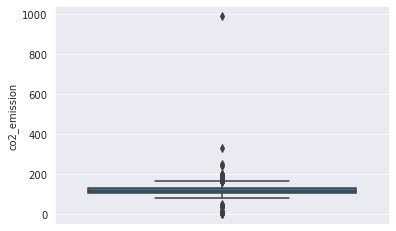

In [1072]:
sns.boxplot(data=df, y="co2_emission" );

In [1073]:
df.loc[df["co2_emission"] > 200]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel
535,Audi A1,1.0 TFSI 5-türer Klima Sitzheizung,Compact,12990,NaN,41200.0,2016-02-01,1.0,Audi,70,Used,not_leather,5.0,5.0,Manuel,999.0,331.0,"Air conditioning,Automatic climate control,Electrical side mirrors,Lumbar support,Power windows",NaN,"Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Xenon headlights",NaN,NaN,8.0,NaN,front,NaN,NaN,0588/BDB,NaN,Yes,2020-08-01,1.0,13.8,A1,3.0,2.0,benzine
4556,Audi A3,A3 SPB 1.6 TDI S tronic Sport,Sedans,23500,VAT deductible,27815.0,2018-03-01,NaN,Audi,81,Used,not_leather,5.0,5.0,Automatic,1598.0,990.0,"Multi-function steering wheel,Park Distance Control,Parking assist system sensors rear",Bluetooth,NaN,"ABS,Central door lock,Power steering,Traction control,Xenon headlights",NaN,NaN,NaN,NaN,front,NaN,NaN,NaN,1 (No sticker),NaN,NaN,1.6,38.0,A3,1.0,2.0,diesel
10513,Opel Insignia,2.8 OPC 4x4 Turbo Sports Navi/Leder/Xen,Station wagon,17990,VAT deductible,145000.0,2016-04-01,1.0,Opel,239,Used,leather,4.0,5.0,Automatic,1598.0,253.0,"Air conditioning,Armrest,Automatic climate control,Electrically adjustable seats,Electrical side mirrors,Electric tailgate,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,CD player,Digital radio,Hands-free equipment,On-board computer,Radio,Sound system,USB","Alloy wheels,Roof rack,Shift paddles,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor,Central door lock,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",NaN,NaN,NaN,NaN,4WD,NaN,Germany,NaN,4 (Green),NaN,NaN,2.8,11.0,Insignia,3.0,3.0,lpg
10771,Opel Insignia,1.6 Insignia 1.6 CDTI Sports Tourer Aut. Busines..,Station wagon,12000,Price negotiable,185000.0,2016-02-01,1.0,Opel,100,Used,not_leather,5.0,5.0,Automatic,2967.0,239.0,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,Radio,USB","Alloy wheels,Catalytic Converter,Roof rack,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction...",6.0,NaN,6.0,Metallic,Na

In [1074]:
A = list(df.loc[df["co2_emission"] >200]["co2_emission"].values)

In [1075]:
df["co2_emission"].replace(A, np.NaN, inplace=True)

In [1076]:
fill_na_mean(df["model"], "co2_emission")

0  NaN values remained in  co2_emission  column


In [1077]:
df["co2_emission"].value_counts(dropna=False)

120.000000    740
99.000000     545
97.000000     537
104.000000    501
135.230696    500
102.000000    477
103.000000    445
115.332215    440
114.000000    382
124.000000    372
108.000000    362
107.000000    362
119.000000    361
109.094614    349
106.000000    349
128.000000    329
111.890801    328
104.404514    310
126.000000    282
85.000000     275
118.000000    270
128.272821    269
110.000000    266
127.000000    257
117.000000    254
134.316911    240
111.000000    237
113.000000    235
109.000000    234
139.000000    224
140.000000    218
129.000000    213
135.000000    202
105.000000    202
92.000000     198
130.000000    180
123.000000    178
150.000000    174
143.000000    171
112.000000    171
95.000000     161
116.000000    157
141.000000    156
98.000000     151
133.000000    145
136.000000    145
137.000000    133
125.000000    132
134.000000    130
145.000000    126
149.000000    117
153.000000    113
147.000000    109
101.000000    105
132.000000    100
115.000000

In [1078]:
df[df["co2_emission"].isnull()]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel


In [1079]:
df["model"].value_counts(dropna=False) # A2 is only 1 row in DF so fill_na_mean function will not fill that 
                                       # raw  

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
Name: model, dtype: int64

In [1080]:
df["co2_emission"].fillna(df["co2_emission"].mean, inplace=True)

In [1081]:
df["co2_emission"].isnull().sum()

0

##  comfort

In [1082]:
df["comfort"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [1083]:
df["comfort"].sample(20)

2973                                                                                                                                      Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Split rear seats,Start-stop system,Tinted windows
9830                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [1084]:
comfort_list = list(df.comfort.str.split(pat= ",").dropna())
comfort_list

[['Air conditioning',
  'Armrest',
  'Automatic climate control',
  'Cruise control',
  'Electrical side mirrors',
  'Hill Holder',
  'Leather steering wheel',
  'Light sensor',
  'Multi-function steering wheel',
  'Navigation system',
  'Park Distance Control',
  'Parking assist system sensors rear',
  'Power windows',
  'Rain sensor',
  'Seat heating',
  'Start-stop system'],
 ['Air conditioning',
  'Automatic climate control',
  'Hill Holder',
  'Leather steering wheel',
  'Lumbar support',
  'Parking assist system sensors rear',
  'Power windows',
  'Start-stop system',
  'Tinted windows'],
 ['Air conditioning',
  'Cruise control',
  'Electrical side mirrors',
  'Hill Holder',
  'Leather steering wheel',
  'Multi-function steering wheel',
  'Navigation system',
  'Park Distance Control',
  'Parking assist system sensors front',
  'Parking assist system sensors rear',
  'Power windows',
  'Seat heating',
  'Start-stop system'],
 ['Air suspension',
  'Armrest',
  'Auxiliary heating',

In [1085]:
comfort_list_unique = []
for i in comfort_list:
    if i not in comfort_list_unique:
        for ii in i:
            if ii not in comfort_list_unique:
                comfort_list_unique.append(ii)
comfort_list_unique

['Air conditioning',
 'Armrest',
 'Automatic climate control',
 'Cruise control',
 'Electrical side mirrors',
 'Hill Holder',
 'Leather steering wheel',
 'Light sensor',
 'Multi-function steering wheel',
 'Navigation system',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Start-stop system',
 'Lumbar support',
 'Tinted windows',
 'Parking assist system sensors front',
 'Air suspension',
 'Auxiliary heating',
 'Heads-up display',
 'Split rear seats',
 'Keyless central door lock',
 'Electrically heated windshield',
 'Seat ventilation',
 'Wind deflector',
 'Leather seats',
 'Sunroof',
 'Panorama roof',
 'Parking assist system camera',
 'Electrically adjustable seats',
 'Parking assist system self-steering',
 'Windshield',
 'Electric tailgate',
 'Heated steering wheel',
 'Massage seats',
 'Electric Starter']

In [1086]:
high_comfort_list =['Massage seats', 'Parking assist system self-steering', 'Seat heating'
                    'Electrically adjustable seats', 'Seat ventilation', 'Leather seats',
                    'Panorama roof'
                   ]

In [1087]:
high_comfort_column_list = []
for i in df.comfort.str.split(pat= ","):
    if type(i) == float:
        high_comfort_column_list.append(i)
    else:    
        if any(item in high_comfort_list for item in i):
            high_comfort_column_list.append("high_comfort")
        else:
            high_comfort_column_list.append("not_high_comfort")
high_comfort_column_list

['not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 nan,
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 nan,
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_high_comfort',
 'not_hig

In [1088]:
df["high_comfort"] = high_comfort_column_list

In [1089]:
df["high_comfort"].value_counts(dropna=False)

not_high_comfort    13149
high_comfort         1849
NaN                   920
Name: high_comfort, dtype: int64

In [1090]:
fill_na_mode(df["model"], "high_comfort")

0  NaN values remained in  high_comfort  column


In [1091]:
df["high_comfort"].value_counts(dropna=False)

not_high_comfort    13999
high_comfort         1919
Name: high_comfort, dtype: int64

## digi_media

In [1092]:
df["digi_media"].value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             782
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

In [1093]:
def find_uniq_in_column(column_name):
    '''This function finds the unique values of a column that is generated from comma seperated string values like: Bluetooth,CD player,Digital radio,Hands-free equipment,Radio
    '''
    non_uniqe_list = list(df[column_name].str.split(pat= ",").dropna())
    list_unique = []
    for i in non_uniqe_list:
        if i not in list_unique:
            for ii in i:
                if ii not in list_unique:
                    list_unique.append(ii)
    return list_unique

In [1094]:
find_uniq_in_column("digi_media")

['Bluetooth',
 'Hands-free equipment',
 'On-board computer',
 'Radio',
 'Sound system',
 'MP3',
 'CD player',
 'USB',
 'Digital radio',
 'Television']

In [1095]:
rich_media_list = [ 'Bluetooth', 'USB', 'Hands-free equipment','Television']

In [1096]:
rich_media_column_list = []
for i in df.digi_media.str.split(pat= ","):
    if type(i) == float:
        rich_media_column_list.append(i)
    else:    
        if any(item in rich_media_list for item in i):
            rich_media_column_list.append("rich_media")
        else:
            rich_media_column_list.append("not_rich_media")
rich_media_column_list

['rich_media',
 'rich_media',
 'not_rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'not_rich_media',
 'not_rich_media',
 nan,
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'not_rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'not_rich_media',
 'rich_media',
 'not_rich_media',
 'rich_media',
 'not_rich_media',
 nan,
 nan,
 nan,
 'rich_media',
 'not_rich_media',
 'not_rich_media',
 'rich_media',
 'rich_media',
 'not_rich_media',
 'not_rich_media',
 'not_rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'not_rich_media',
 'not_rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 nan,
 'not_rich_media',
 nan,
 'not_rich_media',
 'not_rich_media',
 'not_rich_media',
 'not_rich_media',
 'not_rich_media',
 'not_rich_media',
 'rich_media',
 'rich_media',
 'rich_media',
 'not_rich_media',
 'not_

In [1097]:
df["rich_media"] = rich_media_column_list

In [1098]:
df["rich_media"].value_counts(dropna=False)

rich_media        12470
not_rich_media     2074
NaN                1374
Name: rich_media, dtype: int64

In [1099]:
fill_na_mode(df["model"], "rich_media")

0  NaN values remained in  rich_media  column


## extra 

In [1100]:
df.extra.value_counts(dropna=False)

Alloy wheels                                                                                               3244
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [1101]:
find_uniq_in_column("extra")

['Alloy wheels',
 'Catalytic Converter',
 'Voice Control',
 'Sport seats',
 'Sport suspension',
 'Sport package',
 'Shift paddles',
 'Winter tyres',
 'Touch screen',
 'Handicapped enabled',
 'Trailer hitch',
 'Cab or rented Car',
 'Roof rack',
 'Tuned car',
 'Ski bag',
 'Sliding door',
 'Right hand drive']

In [1102]:
valuable_extra = ['Sport package','Voice Control', 'Winter tyres',  'Touch screen']

In [1103]:
valuable_extra_column_list = []
for i in df.extra.str.split(pat= ","):
    if type(i) == float:
        valuable_extra_column_list.append(i)
    else:    
        if any(item in valuable_extra for item in i):
            valuable_extra_column_list.append("yes")
        else:
            valuable_extra_column_list.append("no")
valuable_extra_column_list

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 nan,
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 nan,
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 nan,
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 nan,
 'no',
 nan,
 'no',
 'no',
 nan,
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 nan,
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 nan,
 nan,
 'no',
 'yes',
 'no',
 nan,
 nan,
 nan,
 nan,
 'yes',
 'yes',
 'yes',
 nan,
 'yes',
 'no',
 'yes',
 nan,
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 nan,
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 nan,
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes

In [1104]:
df["valuable_extra"] = valuable_extra_column_list

In [1105]:
df["valuable_extra"].value_counts(dropna=False)

yes    6738
no     6218
NaN    2962
Name: valuable_extra, dtype: int64

In [1106]:
fill_na_mode(df["model"], "valuable_extra" )

0  NaN values remained in  valuable_extra  column


## safety

In [1107]:
df["safety"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [1108]:
find_uniq_in_column("safety")

['ABS',
 'Central door lock',
 'Daytime running lights',
 'Driver-side airbag',
 'Electronic stability control',
 'Fog lights',
 'Immobilizer',
 'Isofix',
 'Passenger-side airbag',
 'Power steering',
 'Side airbag',
 'Tire pressure monitoring system',
 'Traction control',
 'Xenon headlights',
 'Central door lock with remote control',
 'Head airbag',
 'Alarm system',
 'Driver drowsiness detection',
 'Emergency system',
 'LED Headlights',
 'Adaptive headlights',
 'LED Daytime Running Lights',
 'Rear airbag',
 'Emergency brake assistant',
 'Adaptive Cruise Control',
 'Night view assist',
 'Traffic sign recognition',
 'Lane departure warning system',
 'Blind spot monitor']

In [1109]:
safety_selected = ['Tire pressure monitoring system', 'Lane departure warning system', 'Blind spot monitor', 
                   'Night view assist', 'Adaptive Cruise Control', 'Emergency brake assistant']

In [1110]:
safety_selected_column_list = []
for i in df.safety.str.split(pat= ","):
    if type(i) == float:
        safety_selected_column_list.append(i)
    else:    
        if any(item in safety_selected for item in i):
            safety_selected_column_list.append("yes")
        else:
            safety_selected_column_list.append("no")
safety_selected_column_list

['yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 nan,
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 nan,
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 nan,
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 '

In [1111]:
df["safety_selected"] = safety_selected_column_list

In [1112]:
df["safety_selected"].value_counts(dropna=False)

yes    11141
no      3795
NaN      982
Name: safety_selected, dtype: int64

In [1113]:
fill_na_mode(df["model"], "safety_selected")

0  NaN values remained in  safety_selected  column


## gears

In [1114]:
df["gears"].value_counts(dropna=False)

6.0     5822
NaN     4711
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [1115]:
df.loc[df["gears"] == 50]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
14495,Renault Clio,LIMITED 2018 TCe 75 Klima/LED,Sedans,10798,VAT deductible,10.0,2019-01-01,1.0,Renault,56,Pre-registered,not_leather,5.0,5.0,Manuel,898.0,118.0,"Air conditioning,Cruise control,Electrical side mirrors,Leather steering wheel,Power windows,Start-stop system",USB,NaN,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Isofix,LED Daytime Running Lights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control",50.0,NaN,NaN,Metallic,NaN,1165.0,Germany,3333/BJR,4 (Green),NaN,NaN,1.5,5.2,Clio,0.0,0.0,benzine,not_high_comfort,rich_media,no,yes


In [1116]:
df.at[14495, "gears"] = 5.0

In [1117]:
df.loc[df["gears"] == 9]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
15812,Renault Espace,1.8 TCe Initiale Paris 7p NWPR:,Van,54982,VAT deductible,11.0,2019-07-01,NaN,Renault,165,New,leather,5.0,5.0,Automatic,1798.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power wi...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",9.0,NaN,4.0,Metallic,NaN,1647.0,Netherlands,NaN,NaN,NaN,NaN,1.8,7.6,Espace,0.0,0.0,lpg,high_comfort,not_rich_media,yes,yes
15814,Renault Espace,1.8 TCe Initiale Paris 7p NWPR:,Van,54982,VAT deductible,11.0,2019-07-01,NaN,Renault,165,New,leather,5.0,5.0,Automatic,1798.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power wi...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",9.0,NaN,4.0,Metallic,NaN,1647.0,Netherlands,NaN,NaN,NaN,NaN,1.8,7.6,Espace,0.0,0.0,lpg,high_comfort,not_rich_media,yes,yes
15824,Renault Espace,"1.8 TCe Initiale Paris 5p NWPR: € 61.685,-",Van,52711,VAT deductible,11.0,2019-07-01,NaN,Renault,165,New,leather,5.0,5.0,Automatic,1798.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power wi...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",9.0,NaN,4.0,Metallic,NaN,1608.0,Netherlands,NaN,NaN,NaN,NaN,1.8,7.4,Espace,0.0,0.0,lpg,high_comfort,not_rich_media,yes,yes
15827,Renault Espace,"1.8 TCe Initiale Paris 5p NWPR: € 61.685,-",Van,52711,VAT deductible,11.0,2019-07-01,NaN,Renault,165,New,leather,5.0,5.0,Automatic,1798.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise

In [1118]:
df.loc[df["gears"] == 1]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
8921,Opel Corsa,1.4 benzine - Enjoy - Automaat,Compact,11000,VAT deductible,24000.0,2018-04-01,1.0,Opel,66,Used,not_leather,5.0,5.0,Manuel,1398.0,112.000000,"Air conditioning,Light sensor,Multi-function steering wheel,Navigation system,Power windows,Rain sensor","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Fog lights,Passenger-side airbag,Power steering,Tire pressure monitoring system",1.0,24.0,4.0,Metallic,front,1163.0,Belgium,NaN,NaN,NaN,NaN,1.4,4.8,Corsa,1.0,1.0,lpg,not_high_comfort,rich_media,yes,yes
14375,Renault Clio,Renault R.S. 200 EDC,Compact,23990,NaN,10.0,2018-10-01,NaN,Renault,147,Demonstration,not_leather,4.0,5.0,Automatic,1618.0,111.890801,"Air conditioning,Automatic climate control,Cruise control,Multi-function steering wheel,Navigation system,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,LED Headlights,Side airbag,Tire pressure monitoring system,Traction control",1.0,NaN,NaN,NaN,NaN,1288.0,Austria,NaN,NaN,NaN,NaN,1.5,NaN,Clio,1.0,0.0,lpg,not_high_comfort,rich_media,yes,yes


In [1119]:
df.at[8921, "gears"] = np.NaN
df.at[14375, "gears"] = np.NaN

In [1120]:
df.loc[df["gears"] == 2]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
9812,Opel Corsa,1.2i ENJOY 5D*NAVI*ALU VELGEN*AIRCO,Sedans,9880,VAT deductible,19247.0,2018-05-01,NaN,Opel,51,Used,not_leather,5.0,5.0,Manuel,1229.0,128.272821,"Air conditioning,Light sensor,Navigation system,Power windows,Rain sensor","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog lights,Passenger-side airbag,Power steering,Traction control",2.0,NaN,4.0,Metallic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,Corsa,1.0,1.0,lpg,not_high_comfort,rich_media,no,no


In [1121]:
df.at[9812, "gears"] = np.NaN

In [1122]:
df.loc[df["gears"] == 3]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
15817,Renault Espace,2.0 dCi In.Paris 7p.,Van,54204,VAT deductible,11.0,2019-05-01,NaN,Renault,146,New,leather,5.0,5.0,Automatic,1997.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power wi...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",3.0,NaN,4.0,Metallic,NaN,1779.0,Netherlands,NaN,NaN,NaN,NaN,2.0,5.4,Espace,0.0,0.0,diesel,high_comfort,not_rich_media,yes,yes
15845,Renault Espace,2.0 dCi 160 Intens 5p.,Van,46660,VAT deductible,11.0,2019-09-01,NaN,Renault,118,New,leather,5.0,5.0,Automatic,1997.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",3.0,NaN,4.0,NaN,NaN,1733.0,Netherlands,NaN,NaN,NaN,NaN,2.0,5.1,Espace,0.0,0.0,diesel,not_high_comfort,not_rich_media,yes,yes


In [1123]:
df.at[15817, "gears"] = np.NaN
df.at[15845, "gears"] = np.NaN


In [1124]:
df.loc[df["gears"] == 4]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
15822,Renault Espace,1.8 TCe Intens 7p. [Pack Lumière + Easy Life Pack],Van,50950,VAT deductible,11.0,2019-03-01,NaN,Renault,165,New,not_leather,5.0,5.0,Automatic,1798.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Electric tailgate,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",4.0,NaN,4.0,Metallic,NaN,1647.0,Netherlands,NaN,NaN,NaN,NaN,1.8,7.6,Espace,0.0,0.0,lpg,high_comfort,not_rich_media,yes,yes
15823,Renault Espace,1.8 TCe Intens 7p. [Panoramadak + Camera],Van,50950,VAT deductible,11.0,2019-03-01,NaN,Renault,165,New,not_leather,5.0,5.0,Automatic,1798.0,134.316911,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Electric tailgate,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",4.0,NaN,4.0,Metallic,NaN,1647.0,Netherlands,NaN,NaN,NaN,NaN,1.8,7.6,Espace,0.0,0.0,lpg,high_comfort,not_rich_media,yes,yes


In [1125]:
df.at[15822, "gears"] = np.NaN

In [1126]:
df.at[15823, "gears"] = np.NaN

In [1127]:
df["gears"].value_counts(dropna=False)

6.0    5822
NaN    4718
5.0    3240
7.0    1908
8.0     224
9.0       6
Name: gears, dtype: int64

In [1128]:
df[["gears"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15918 entries, 0 to 15918
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   gears   float64
dtypes: float64(1)
memory usage: 764.8 KB


In [1129]:
df["gears"].value_counts(dropna=False)

6.0    5822
NaN    4718
5.0    3240
7.0    1908
8.0     224
9.0       6
Name: gears, dtype: int64

In [1130]:
df.loc[df["gears"] == np.NaN]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected


In [1131]:
df["gears"].dropna(inplace=True)
df["gears"].value_counts(dropna=False)

6.0    5822
NaN    4718
5.0    3240
7.0    1908
8.0     224
9.0       6
Name: gears, dtype: int64

In [1132]:
df["gears"].sort_values()

8754     5.0
13700    5.0
13699    5.0
13698    5.0
13697    5.0
        ... 
15906    NaN
15908    NaN
15911    NaN
15913    NaN
15918    NaN
Name: gears, Length: 15918, dtype: float64

In [1133]:
df.iloc[[2614]]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected
2615,Audi A3,"1,5 TFSI BENZINA TURBO 155 CV CABRIO",Convertible,10893,VAT deductible,19800.0,2018-06-01,NaN,Audi,110,Used,leather,2.0,4.0,Automatic,1498.0,116.0,"Air conditioning,Armrest,Automatic climate control,Cruise control,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Sunroof","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB","Alloy wheels,Shift paddles","ABS,Adaptive Cruise Control,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Immobilizer,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",7.0,16.0,4.0,NaN,front,1470.0,Italy,NaN,NaN,NaN,NaN,1.6,5.1,A3,1.0,1.0,lpg,not_high_comfort,rich_media,no,yes


In [1134]:
df["gears"].value_counts(dropna=False)

6.0    5822
NaN    4718
5.0    3240
7.0    1908
8.0     224
9.0       6
Name: gears, dtype: int64

In [1177]:
fill_na_mode(df["model"], "gears")

0  NaN values remained in  gears  column


In [1178]:
df["gears"].value_counts(dropna=False)

6.0    8413
5.0    5367
7.0    1908
8.0     224
9.0       6
Name: gears, dtype: int64

## warranty

In [1136]:
df["warranty"].value_counts(dropna=False)

NaN     13122
12.0     1417
24.0      552
60.0      382
36.0      223
6.0        49
72.0       44
48.0       40
3.0        14
23.0       10
18.0        7
20.0        7
25.0        5
50.0        4
16.0        4
2.0         4
34.0        3
1.0         2
11.0        2
14.0        2
45.0        2
22.0        2
21.0        2
17.0        2
46.0        2
26.0        2
13.0        2
65.0        1
33.0        1
28.0        1
15.0        1
7.0         1
19.0        1
10.0        1
56.0        1
49.0        1
47.0        1
40.0        1
Name: warranty, dtype: int64

In [1137]:
warranty_12_months = []
for i in df["warranty"]:
    if i >= 12:
        warranty_12_months.append("yes")
    else:
        warranty_12_months.append("no")
warranty_12_months

['no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',


In [1138]:
df["warranty_12_months"] = warranty_12_months

In [1139]:
df["warranty_12_months"].value_counts(dropna=False)

no     13195
yes     2723
Name: warranty_12_months, dtype: int64

## cylinders

In [1140]:
df["cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5679
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: cylinders, dtype: int64

In [1141]:
fill_na_mode(df["model"], "cylinders")

0  NaN values remained in  cylinders  column


In [1142]:
df.loc[df["cylinders"] == 1]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
9956,Opel Corsa,"1.4 120 Jahre Automatik, OPC-Line, Parkpilot, Inte",Compact,16625,VAT deductible,100.0,2019-04-01,1.0,Opel,66,Pre-registered,not_leather,3.0,5.0,Automatic,1398.0,140.0,"Air conditioning,Automatic climate control,Cruise control,Electrically heated windshield,Electrical side mirrors,Heated steering wheel,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating","Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Radio","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",6.0,NaN,1.0,Metallic,front,1163.0,Germany,NaN,NaN,NaN,2022-04-01,1.4,6.0,Corsa,0.0,0.0,benzine,not_high_comfort,rich_media,no,yes,no


In [1143]:
df.loc[df["cylinders"] == 2]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
11342,Opel Insignia,NaN,Station wagon,21900,VAT deductible,13600.0,2018-05-01,1.0,Opel,100,Employee's car,leather,5.0,5.0,Automatic,1598.0,135.230696,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Electric tailgate,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system,Tinted windows","Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,USB","Alloy wheels,Catalytic Converter,Touch screen,Voice Control","ABS,Central door lock with remote control,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Head airbag,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition",6.0,NaN,2.0,Metallic,front,NaN,Italy,NaN,NaN,NaN,NaN,1.6,NaN,Insignia,1.0,1.0,diesel,not_high_comfort,rich_media,yes,yes,no
15835,Renault Espace,BLUEdCi200 EU6D Initiale Automatik,Van,47590,VAT deductible,6000.0,2019-02-01,NaN,Renault,147,Employee's car,leather,5.0,7.0,Automatic,1997.0,139.000000,"Air conditioning,Automatic climate control,Electrically adjustable seats,Electrical side mirrors,Electric tailgate,Leather steering wheel,Light sensor,Massage seats,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,USB",Voice Control,"ABS,Alarm system,Blind spot monitor,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency brake assistant,Fog lights,Immobilizer,LED Headlights,Power steering,Side airbag,Tire pressure monitoring system,Traction control",6.0,NaN,2.0,Metallic,front,1840.0,Germany,NaN,4 (Green),NaN,NaN,1.6,5.3,Espace,0.0,1.0,diesel,high_comfort,rich_media,yes,yes,no


In [1144]:
df.loc[df["cylinders"] == 3]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000000,2016-01-01,2.0,Audi,66,Used,not_leather,5.0,5.0,Automatic,1422.0,99.0,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",NaN,NaN,3.0,Metallic,front,1220.0,NaN,0588/BDF,NaN,Yes,2021-06-01,1.4,3.8,A1,3.0,3.0,diesel,not_high_comfort,rich_media,yes,yes,no
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+music,Sedans,14640,VAT deductible,83450.000000,2016-02-01,1.0,Audi,85,Used,not_leather,4.0,4.0,Automatic,1598.0,99.0,"Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",NaN,NaN,3.0,Metallic,front,NaN,NaN,NaN,4 (Green),NaN,NaN,1.6,3.8,A1,3.0,3.0,diesel,not_high_comfort,not_rich_media,yes,yes,no
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.000000,2016-08-01,1.0,Audi,66,Used,not_leather,3.0,4.0,Automatic,1422.0,99.0,"Air suspension,Armrest,Auxiliary heating,Electrical side mirrors,Heads-up display,Hill Holder,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Power windows,Rain sensor,Seat heating,Split rear seats,Start-stop system","Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote control,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency system,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system",6.0,NaN,3.0,Metallic,NaN,1195.0,NaN,NaN,NaN,NaN,NaN,1.4,3.8,A1,3.0,3.0,diesel,not_high_comfort,rich_media,yes,yes,no
4,Audi A1,"Sportback 1.4 TDI S-Tronic S-Line Ext. admired, Xe",Sedans,16790,NaN,16200.000000,2016-05-01,1.0,Audi,66,Used,not_leather,5.0,5.0,Automatic,1422.0,109.0,"Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system","Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Sport package,Sport suspension,Voice Control","ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",NaN,NaN,3.0,Metallic,front,NaN,Germany,0588/BDF,NaN,Yes,NaN,1.4

In [1145]:
df.loc[df["cylinders"] == 5]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
3587,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,64900,NaN,35000.0,2018-04-01,NaN,Audi,294,Used,not_leather,5.0,5.0,Manuel,2480.0,189.000000,"Air conditioning,Seat ventilation,Split rear seats",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central door lock,Driver-side airbag,Lane departure warning system,Power steering,Side airbag,Tire pressure monitoring system,Traction control",7.0,NaN,5.0,NaN,NaN,1585.0,NaN,NaN,NaN,NaN,NaN,2.5,8.3,A3,1.0,2.0,lpg,high_comfort,not_rich_media,no,yes,no
3590,Audi A3,RS 3 SPB Quattro S Tronic,Sedans,62900,NaN,700.0,2019-03-01,NaN,Audi,294,Used,not_leather,5.0,5.0,Manuel,2480.0,194.000000,"Air conditioning,Seat ventilation,Split rear seats","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Central door lock,Driver-side airbag,Lane departure warning system,Power steering,Side airbag,Tire pressure monitoring system,Traction control",7.0,NaN,5.0,NaN,NaN,1585.0,NaN,NaN,NaN,NaN,NaN,1.6,8.3,A3,0.0,0.0,lpg,high_comfort,rich_media,no,yes,no
3592,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic ! FAST VOLL,Sedans,56900,NaN,5200.0,2018-08-01,1.0,Audi,294,Used,leather,5.0,5.0,Manuel,2480.0,189.000000,"Air conditioning,Air suspension,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Tinted windows","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system","Alloy wheels,Shift paddles,Sport package,Sport seats,Sport suspension,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Emergency system,Fog lights,Head airbag,Isofix,Lane departure warning system,LED Daytime Running Lights,LED Headlights,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",7.0,NaN,5.0,NaN,4WD,1585.0,Italy,NaN,NaN,NaN,NaN,2.5,8.3,A3,1.0,1.0,lpg,high_comfort,rich_media,yes,yes,no
3593,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,58500,NaN,10000.0,2018-05-01,NaN,Audi,294,Used,not_leather,5.0,5.0,Manuel,2480.0,189.000000,"Air conditioning,Seat ventilation,Split rear seats",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central door lock,Driver-side airbag,Lane departure warning system,Power steering,Side airbag,Tire pressure monitoring system,Traction control",7.0,NaN,5.0,NaN,NaN,1585.0,NaN,NaN,NaN,NaN,NaN,2.5,8.3,A3,1.0,1.0,lpg,high_comfort,not_rich_media,no,yes,no
3595,Audi A3,RS 3 SPB 2.5 TFSI quattro S tronic,Station wagon,63900,VAT deductible,10.0,2019-06-01,1.0,Audi,294,Used,leather,5.0,5.0,Manuel,2480.0,189.000000,"Air conditioning,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heads-up display,Heated steering wheel,Hill Holder,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power win...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,S

In [1146]:
df.loc[df["cylinders"] == 6]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
10771,Opel Insignia,1.6 Insignia 1.6 CDTI Sports Tourer Aut. Busines..,Station wagon,12000,Price negotiable,185000.0,2016-02-01,1.0,Opel,100,Used,not_leather,5.0,5.0,Automatic,2967.0,135.145357,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrically heated windshield,Electrical side mirrors,Electric tailgate,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,Radio,USB","Alloy wheels,Catalytic Converter,Roof rack,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,Lane departure warning system,LED Daytime Running Lights,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction...",6.0,NaN,6.0,Metallic,NaN,2295.0,NaN,NaN,NaN,NaN,2021-02-01,1.6,9.1,Insignia,3.0,3.0,diesel,high_comfort,rich_media,yes,yes,no
10826,Opel Insignia,NaN,Station wagon,12500,Price negotiable,77500.0,2017-03-01,NaN,Opel,100,Used,not_leather,5.0,5.0,Automatic,1598.0,129.000000,"Air conditioning,Armrest,Automatic climate control,Electrically heated windshield,Electrical side mirrors,Leather steering wheel,Light sensor,Massage seats,Multi-function steering wheel,Navigation system,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB","Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,Fog lights,Immobilizer,Isofix,Tire pressure monitoring system,Xenon headlights",7.0,NaN,6.0,NaN,front,NaN,NaN,NaN,4 (Green),NaN,NaN,1.6,5.4,Insignia,2.0,3.0,diesel,high_comfort,rich_media,yes,yes,no
12897,Opel Insignia,INNOVATION,Sedans,26500,VAT deductible,5.0,2019-03-01,1.0,Opel,100,Used,leather,5.0,5.0,Manuel,1600.0,135.230696,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Light sensor,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Passenger-side airbag,Side airbag,Traction control",6.0,12.0,6.0,Uni/basic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,Insignia,0.0,0.0,diesel,not_high_comfort,rich_media,no,no,yes


In [1147]:
df.loc[df["cylinders"] == 8]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
535,Audi A1,1.0 TFSI 5-türer Klima Sitzheizung,Compact,12990,NaN,41200.0,2016-02-01,1.0,Audi,70,Used,not_leather,5.0,5.0,Manuel,999.0,104.317795,"Air conditioning,Automatic climate control,Electrical side mirrors,Lumbar support,Power windows",NaN,"Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Xenon headlights",NaN,NaN,8.0,NaN,front,NaN,NaN,0588/BDB,NaN,Yes,2020-08-01,1.0,13.8,A1,3.0,2.0,benzine,not_high_comfort,rich_media,no,no,no
15055,Renault Espace,DCI 160 CH INITIALE PARIS EDC,Van,24990,NaN,47423.0,2017-01-01,NaN,Renault,117,Used,not_leather,5.0,5.0,Automatic,1598.0,134.316911,Park Distance Control,NaN,Alloy wheels,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,Espace,2.0,2.0,diesel,not_high_comfort,rich_media,no,yes,no


In [1148]:
df.loc[df["cylinders"] > 4][["cylinders"]]

,cylinders
535,8.0
3587,5.0
3590,5.0
3592,5.0
3593,5.0
3595,5.0
3596,5.0
3598,5.0
3599,5.0
3600,5.0


In [1149]:
df["cylinders"].replace([1, 2, 5, 6, 8], 4, inplace=True)

In [1150]:
df["cylinders"].value_counts(dropna=False)

4.0    12955
3.0     2963
Name: cylinders, dtype: int64

## paint_type

In [1151]:
df["paint_type"].value_counts(dropna=False)

Metallic       9793
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

## drive_chain

In [1152]:
df["drive_chain"].value_counts(dropna=False)

front    8885
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [1153]:
fill_na_mode(df["model"], "drive_chain")

0  NaN values remained in  drive_chain  column


## weight_kg

In [1154]:
df["weight_kg"].value_counts(dropna=False)

NaN       6973
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: weight_kg, Length: 435, dtype: int64

In [1155]:
df["model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
Name: model, dtype: int64

In [1156]:
# fill_na_mode(df["model"], "weight_kg") raises err because all Duster weight values are null.
# we will first fill it and rerun the func.

In [1157]:
df.loc[df["model"] == "Duster"].T

,14894,14895,14896,14897,14898,14899,14900,14901,14902,14903,14904,14905,14906,14907,14908,14909,14910,14911,14912,14913,14914,14915,14916,14917,14918,14919,14920,14921,14922,14923,14924,14925,14926,14927
make_model,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster,Renault Duster
short_description,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,P1.6L 4x4 MT 2018 - ONLY TO EXPORT OUT EU,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,1.6L PETROL 4WD 4X4 NEW CAR FOR EXPORT,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Deluxe - EXPORT OUT EU TROPICAL VERSION - EXPORT O,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT,Standard - EXPORT OUT EU TROPICAL VERSION - EXPORT
body_type,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road,Off-Road
price,13250,16033,16033,16033,16033,13250,13250,13250,10850,14399,14399,13189,14823,14823,14823,14399,14399,14823,13189,13189,13189,12250,12250,12250,12250,11900,11900,12000,11900,11900,10900,10900,10900,10900
vat,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,NaN,NaN,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
km,33777.726625,33777.726625,101.0,33777.726625,101.0,101.0,33777.726625,101.0,33777.726625,101.0,33777.726625,33777.726625,101.0,101.0,33777.726625,33777.726625,101.0,33777.726625,101.0,33777.726625,101.0,101.0,101.0,33777.726625,33777.726625,33777.726625,101.0,33777.726625,33777.726625,101.0,33777.726625,101.0,101.0,33777.726625
registration,NaT,NaT,2019-06-01 00:00:00,NaT,2019-06-01 00:00:00,2019-06-01 00:00:00,NaT,2019-06-01 00:00:00,NaT,2019-06-01 00:00:00,NaT,NaT,2019-06-01 00:00:00,2019-06-01 00:00:00,NaT,NaT,2019-06-01 00:00:00,NaT,2019-06-01 00:00:00,NaT,2019-06-01 00:00:00,2019-06-01 00:00:00,2019-06-01 00:00:00,NaT,NaT,NaT,2019-06-01 00:00:00,NaT,NaT,2019-06-01 00:00:00,NaT,2019-06

In [1158]:
df.loc[df["model"] == "Duster", "weight_kg"] = 1235

In [1159]:
df.loc[df["model"] == "Duster"]["weight_kg"]

14894    1235.0
14895    1235.0
14896    1235.0
14897    1235.0
14898    1235.0
14899    1235.0
14900    1235.0
14901    1235.0
14902    1235.0
14903    1235.0
14904    1235.0
14905    1235.0
14906    1235.0
14907    1235.0
14908    1235.0
14909    1235.0
14910    1235.0
14911    1235.0
14912    1235.0
14913    1235.0
14914    1235.0
14915    1235.0
14916    1235.0
14917    1235.0
14918    1235.0
14919    1235.0
14920    1235.0
14921    1235.0
14922    1235.0
14923    1235.0
14924    1235.0
14925    1235.0
14926    1235.0
14927    1235.0
Name: weight_kg, dtype: float64

In [1160]:
fill_na_mode(df["model"], "weight_kg")

0  NaN values remained in  weight_kg  column


## country_ver

In [1161]:
df["country_ver"].value_counts(dropna=False)

NaN               8333
Germany           4501
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_ver, dtype: int64

In [1162]:
fill_na_mode(df["model"], "country_ver")

0  NaN values remained in  country_ver  column


## model_code

In [1163]:
df["model_code"].value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/ACW        1
0000/ACP        1
0588/BLF        1
0035/BGY        1
3333/BKG        1
Name: model_code, Length: 232, dtype: int64

## Emission_Label

In [1164]:
df["Emission_Label"].value_counts(dropna=False)

NaN               11974
4 (Green)          3552
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: Emission_Label, dtype: int64

## new_inspection

In [1165]:
df["new_inspection"].value_counts(dropna=False)

NaN    12348
Yes     3570
Name: new_inspection, dtype: int64

In [1166]:
df["new_inspection"].fillna("No", inplace=True)

## next_inspection

In [1167]:
df["next_inspection"].value_counts(dropna=False)

NaN           13094
2021-06-01      437
2021-03-01      172
2021-05-01      153
2021-02-01      149
2021-04-01      142
2021-01-01      117
2022-05-01      116
2022-02-01       96
2020-03-01       88
2022-03-01       85
2022-04-01       82
2022-01-01       75
2021-07-01       60
2021-08-01       59
2020-02-01       56
2020-04-01       52
2020-06-01       50
2020-05-01       50
2020-01-01       48
2021-11-01       47
2020-12-01       47
2020-11-01       46
2019-04-01       37
2020-07-01       35
2020-10-01       35
2019-06-01       33
2019-09-01       32
2019-07-01       30
2019-11-01       29
2021-09-01       29
2020-08-01       29
2019-03-01       28
2019-05-01       27
2019-10-01       27
2019-01-01       27
2019-02-01       27
2022-06-01       26
2019-08-01       25
2020-09-01       21
2021-12-01       20
2021-10-01       16
2019-12-01       13
2001-01-01        5
2018-07-01        5
2018-10-01        5
2018-11-01        4
2018-03-01        2
2018-12-01        2
2018-09-01        2


## consumption_comb

In [1168]:
df["consumption_comb"].value_counts(dropna=False).sort_index()

0.0        2
1.0        1
1.2        1
3.0       69
3.1        7
3.2       25
3.3      307
3.4      106
3.5      288
3.6      194
3.7      369
3.8      585
3.9      732
4.0      712
4.1      341
4.2      408
4.3      295
4.4      595
4.5      511
4.6      420
4.7      555
4.8      523
4.9      347
5.0      513
5.1      630
5.2      429
5.3      375
5.4      663
5.5      342
5.6      568
5.7      302
5.8      142
5.9      308
6.0      278
6.1      135
6.2      184
6.3      141
6.4       64
6.5       36
6.6      119
6.7       33
6.8      134
6.9       21
7.0        9
7.1       38
7.2        6
7.3        2
7.4       62
7.5        1
7.6       14
7.8        6
7.9        2
8.0        5
8.1        2
8.3       20
8.6        3
8.7        3
9.1        1
10.0      34
11.0       1
13.8       1
32.0       1
33.0       1
38.0       2
40.0       2
43.0       1
46.0       1
50.0       1
51.0       4
54.0       1
55.0       1
NaN     2883
Name: consumption_comb, dtype: int64

In [1169]:
df["consumption_comb"].describe()

count    13035.000000
mean         4.856540
std          1.670592
min          0.000000
25%          4.000000
50%          4.700000
75%          5.400000
max         55.000000
Name: consumption_comb, dtype: float64

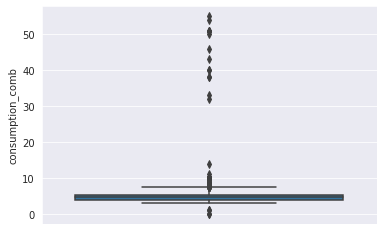

In [1170]:
sns.boxplot(data=df, y="consumption_comb");

In [1171]:
df[(df["consumption_comb"]< 3) | (df["consumption_comb"] > 14)]

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,make,hp_kW,used_new,upholstery_kind,door_count,seat_count,auto_manuel,displacement_cc,co2_emission,comfort,digi_media,extra,safety,gears,warranty,cylinders,paint_type,drive_chain,weight_kg,country_ver,model_code,Emission_Label,new_inspection,next_inspection,cc_from_description,consumption_comb,model,age,km_cat,fuel,high_comfort,rich_media,valuable_extra,safety_selected,warranty_12_months
500,Audi A1,Sportback 1.0TFSI PDC VO+HI KLIMA 17 Zoll,Sedans,13719,VAT deductible,31255.000000,2016-03-01,1.0,Audi,70,Used,not_leather,5.0,5.0,Manuel,999.0,98.000000,"Air conditioning,Armrest,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Start-stop system","Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control",5.0,12.0,3.0,Metallic,front,1135.0,Germany,0588/BDB,NaN,Yes,NaN,1.0,43.0,A1,3.0,2.0,benzine,not_high_comfort,rich_media,yes,yes,yes
2194,Audi A1,1.0TFSI - 95 pk - S-LINE + Navigatie - Xenon,Sedans,21390,VAT deductible,33777.726625,NaT,NaN,Audi,70,New,not_leather,5.0,5.0,Manuel,999.0,116.000000,"Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Split rear seats,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Sport package,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability control,Fog lights,Head airbag,Isofix,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control",5.0,24.0,3.0,Metallic,front,1140.0,Belgium,NaN,NaN,No,NaN,1.0,51.0,A1,1.0,NaN,lpg,not_high_comfort,rich_media,yes,yes,yes
2196,Audi A1,1.0TFSI - 95 pk - S-LINE + Navigatie - Xenon,Sedans,21390,VAT deductible,1.000000,NaT,NaN,Audi,70,New,not_leather,5.0,5.0,Manuel,999.0,116.000000,"Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Split rear seats,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Sport package,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability control,Fog lights,Head airbag,Isofix,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",5.0,24.0,3.0,Metallic,front,1140.0,Belgium,NaN,NaN,No,NaN,1.0,51.0,A1,0.0,0.0,lpg,not_high_comfort,rich_media,yes,yes,yes
2210,Audi A1,1.0TFSI - 95 pk - S-LINE + Navigatie,Sedans,21280,VAT deductible,1.000000,NaT,NaN,Audi,70,New,not_leather,5.0,5.0,Manuel,999.0,116.000000,"Air conditioning,Armrest,Automatic climate control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Split rear seats,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio,USB","Alloy wheels,Sport package,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability control,Fog lights,Head airbag,Isofix,Lane departure warning system,Passenger-

In [1172]:
df[(df["consumption_comb"]< 3) | (df["consumption_comb"] > 14)]["consumption_comb"] 

500      43.0
2194     51.0
2196     51.0
2210     51.0
2237     51.0
4089     40.0
4102     40.0
4556     38.0
4558     38.0
8217      0.0
10566     0.0
11954    55.0
13179    54.0
13678     1.2
14131    32.0
14530    33.0
14584    50.0
14902     1.0
15067    46.0
Name: consumption_comb, dtype: float64

In [1173]:
df.loc[((df["consumption_comb"]< 3) | (df["consumption_comb"] > 14)), "consumption_comb"] = np.NaN

In [1174]:
fill_na_mode(df["model"], "consumption_comb")

0  NaN values remained in  consumption_comb  column


## vat

In [1181]:
df["vat"].value_counts(dropna=False)

VAT deductible      10979
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [1182]:
vat_column_list = []
for i in df["vat"]:
    if i == "VAT deductible":
        vat_column_list.append("yes")
    else:
        vat_column_list.append("no")

In [1183]:
vat_column_list

['yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',

In [1184]:
df["VAT deductible"] = vat_column_list

In [1185]:
df["VAT deductible"].value_counts(dropna=False)

yes    10979
no      4939
Name: VAT deductible, dtype: int64

## prev_owner 

In [ ]:
df["prev_owner"]

In [ ]:
drop_list = ["short_description", "vat", "registration", ]

In [1179]:
df.isnull().sum()

make_model                 0
short_description         46
body_type                  0
price                      0
vat                     4513
km                         0
registration            1597
prev_owner              6828
make                       0
hp_kW                      0
used_new                   0
upholstery_kind            0
door_count                 0
seat_count                 0
auto_manuel                0
displacement_cc            0
co2_emission               0
comfort                  920
digi_media              1374
extra                   2962
safety                   982
gears                      0
warranty               13122
cylinders                  0
paint_type              5772
drive_chain                0
weight_kg                  0
country_ver                0
model_code             10941
Emission_Label         11974
new_inspection             0
next_inspection        13094
cc_from_description        0
consumption_comb           0
model         

In [1176]:
# df.to_csv("scount_cleaned1.csv", index=False)